<a href="https://colab.research.google.com/github/daniellevg04/ATV-4/blob/main/HEURISTICA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####IMPORTS

In [2]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time


####CONSTRUÇÃO POSICIONANDO DO MAIOR AO MENOR CIRCULO

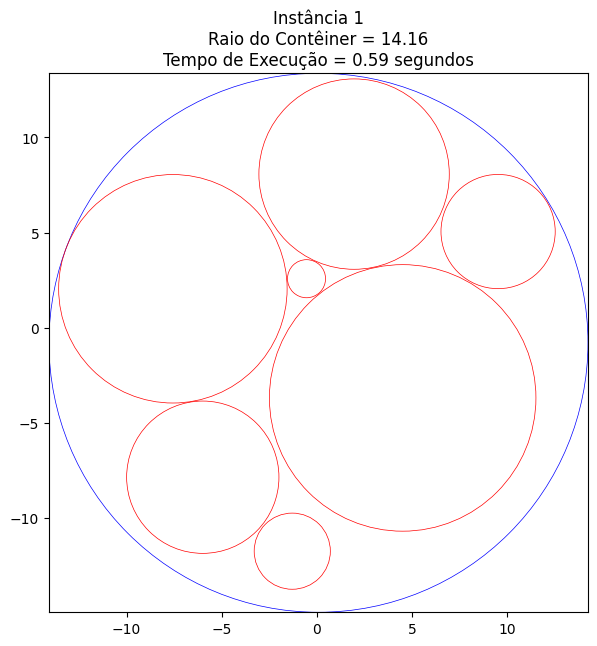

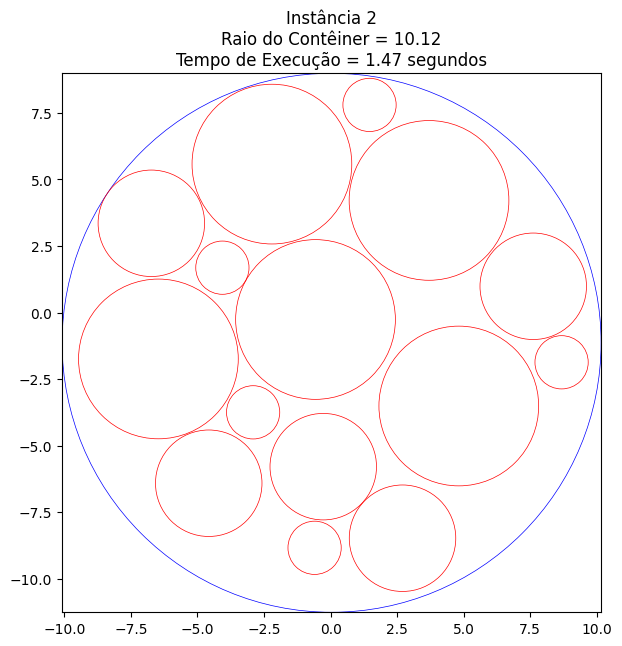

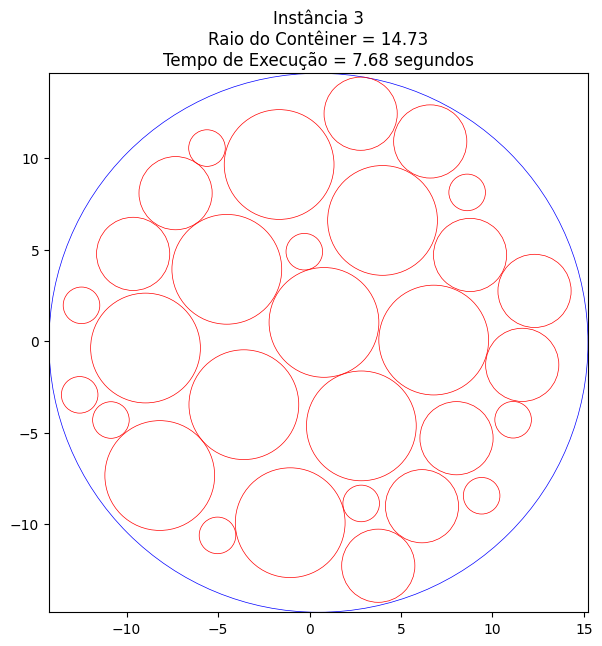

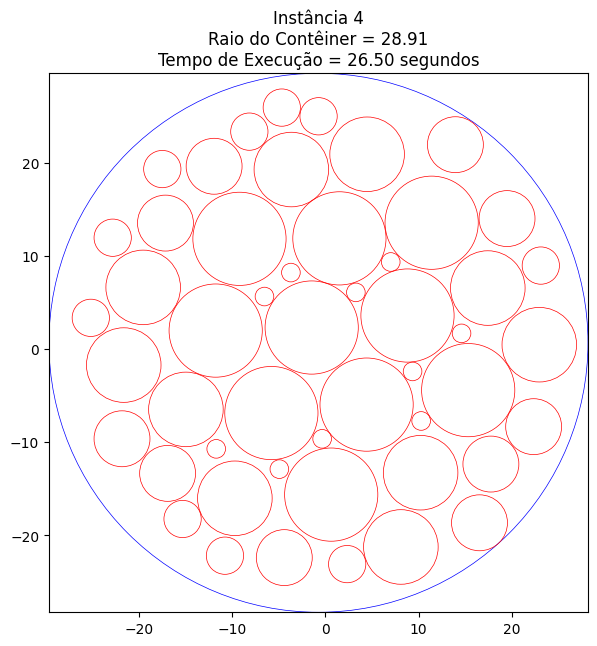

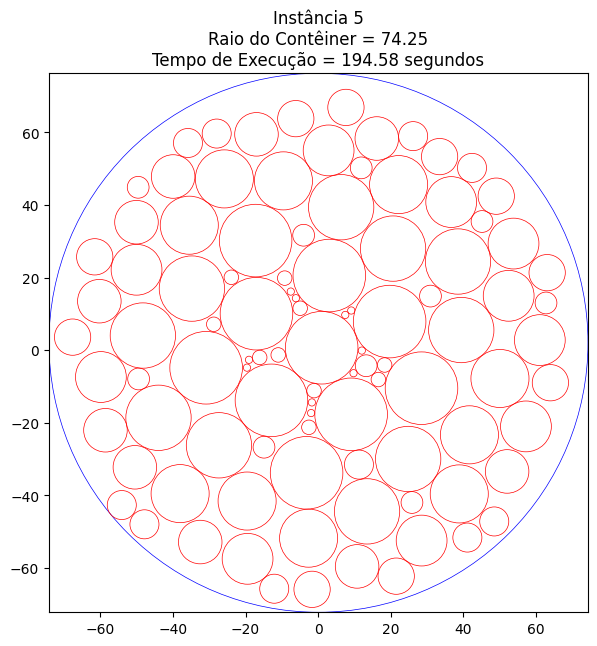

In [34]:
##ESTRATEGIA 2
random.seed(98)
# Definir as instâncias de círculos
instancias_circulos = [
    [{"raio": 1}, {"raio": 2}, {"raio": 3}, {"raio": 4}, {"raio": 5}, {"raio": 6}, {"raio": 7}],
    [{"raio": 1} for _ in range(5)] + [{"raio": 2} for _ in range(5)] + [{"raio": 3} for _ in range(5)],
    [{"raio": 1} for _ in range(10)] + [{"raio": 2} for _ in range(10)] + [{"raio": 3} for _ in range(10)],
    [{"raio": 1} for _ in range(10)] + [{"raio": 2} for _ in range(10)] + [{"raio": 3} for _ in range(10)]  + [{"raio": 4} for _ in range(10)] + [{"raio": 5} for _ in range(10)],
    [{"raio": 1} for _ in range(10)] + [{"raio": 2} for _ in range(10)] + [{"raio": 3} for _ in range(10)]  + [{"raio": 4} for _ in range(10)] + [{"raio": 5} for _ in range(10)] + [{"raio": 6} for _ in range(10)] + [{"raio": 7} for _ in range(10)] + [{"raio": 8} for _ in range(10)]  + [{"raio": 9} for _ in range(10)] + [{"raio": 10} for _ in range(10)]
]

# Função para verificar se um círculo se sobrepõe com outros em uma lista de círculos
def se_sobrepoe(circulo, circulos_em_contenedor):
    for c in circulos_em_contenedor:
        distancia_centros = math.sqrt((circulo["x"] - c["x"])**2 + (circulo["y"] - c["y"])**2)
        if distancia_centros < circulo["raio"] + c["raio"]:
            return True
    return False

# Função para encontrar a posição de um círculo no contêiner com base em uma posição central personalizada
def encontrar_posicao(circulo, circulos_em_contenedor, raio_contenedor, posicao_central):
    intentos = 0
    while intentos < 5900:
        if not circulos_em_contenedor:
            angulo = random.uniform(0, 5 * math.pi)
        elif circulo["raio"] == max(c["raio"] for c in circulos_em_contenedor):
            angulo = random.uniform(0, 20)
        else:
            angulo = random.uniform(0, 5 * math.pi)
        # Gerar uma distância aleatória dentro do círculo
        distancia = random.uniform(0, raio_contenedor - circulo["raio"])
        # Calcular as coordenadas x e y do círculo com base na posição central
        circulo["x"] = posicao_central[0] + distancia * math.cos(angulo)
        circulo["y"] = posicao_central[1] + distancia * math.sin(angulo)
        if not se_sobrepoe(circulo, circulos_em_contenedor):
            return True
        intentos += 1
    return False

# Função principal para resolver o PECD e visualizar a solução para cada instância
def resolver():
    for i, instancia_circulos in enumerate(instancias_circulos):
        circulos_em_contenedor = []
        posicao_central_desejada = (0, 0)

        instancia_circulos = sorted(instancia_circulos, key=lambda x: -x["raio"])

        # Medir o tempo de execução
        start_time = time.time()

        # Colocar os círculos no contêiner
        for circulo in instancia_circulos:
            raio_contenedor_personalizado = circulo["raio"] * 2
            while not encontrar_posicao(circulo, circulos_em_contenedor, raio_contenedor_personalizado, posicao_central_desejada):
                raio_contenedor_personalizado += 1

            circulos_em_contenedor.append(circulo)

        # Calcular o novo centro como a média das coordenadas dos círculos posicionados
        novo_centro_x = sum(circulo["x"] for circulo in circulos_em_contenedor) / len(circulos_em_contenedor)
        novo_centro_y = sum(circulo["y"] for circulo in circulos_em_contenedor) / len(circulos_em_contenedor)

        # Calcular o novo raio como a maior distância entre um círculo e o novo centro mais seu raio
        novo_raio = max(math.sqrt((circulo["x"] - novo_centro_x)**2 + (circulo["y"] - novo_centro_y)**2) + circulo["raio"]
                        for circulo in circulos_em_contenedor)

        # Calcular o tempo de execução
        end_time = time.time()
        tempo_execucao = end_time - start_time

        # Configurar a figura e o eixo
        fig, ax = plt.subplots(figsize=(7, 7))

        # Desenhar o contêiner circular
        contenedor = plt.Circle((novo_centro_x, novo_centro_y), novo_raio, fill=False, color='b', lw=0.5)
        ax.add_patch(contenedor)

        # Desenhar os círculos no contêiner
        for circulo in circulos_em_contenedor:
            circulo_desenho = plt.Circle((circulo["x"], circulo["y"]), circulo["raio"], fill=False, color='r', lw=0.5)
            ax.add_patch(circulo_desenho)

        ax.set_aspect('equal')
        ax.set_xlim(novo_centro_x - novo_raio, novo_centro_x + novo_raio)
        ax.set_ylim(novo_centro_y - novo_raio, novo_centro_y + novo_raio)

        # Adicionar o título ao gráfico com o nome da instância e o tempo de execução
        titulo = f'Instância {i+1}\nRaio do Contêiner = {novo_raio:.2f}\nTempo de Execução = {tempo_execucao:.2f} segundos'
        plt.title(titulo)
        plt.gca().set_aspect('equal', adjustable='box')

        # Salvar a imagem com o nome da instância
        nome_arquivo = f'MAIOR AO MENOR INSTANCIA{i+1}.png'
        plt.savefig(nome_arquivo, dpi=100)
        plt.show()

# Chamar a função principal para resolver e salvar as instâncias
resolver()

####CONSTRUÇÃO POSICIONANDO ALEATORIO

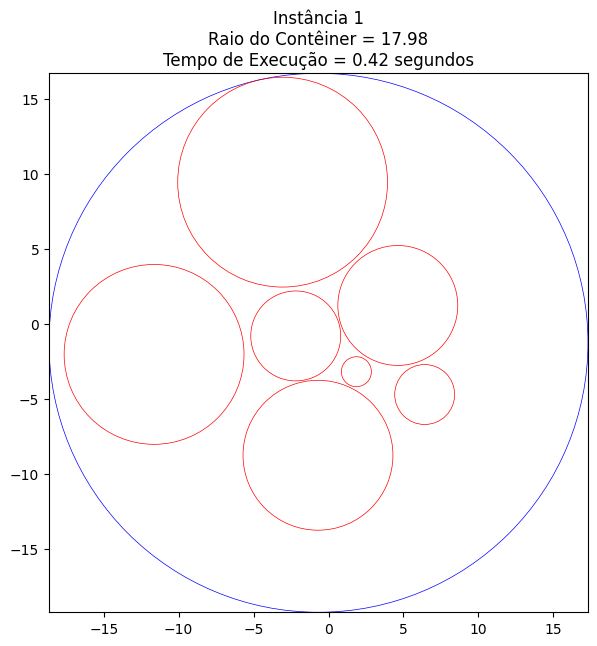

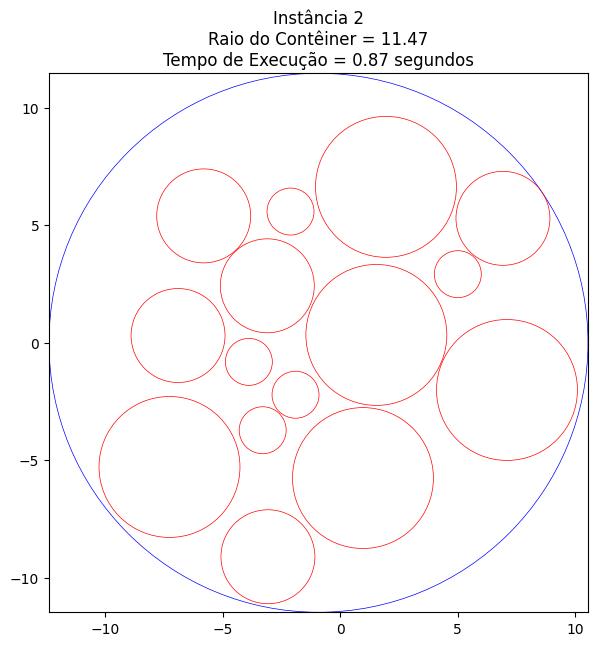

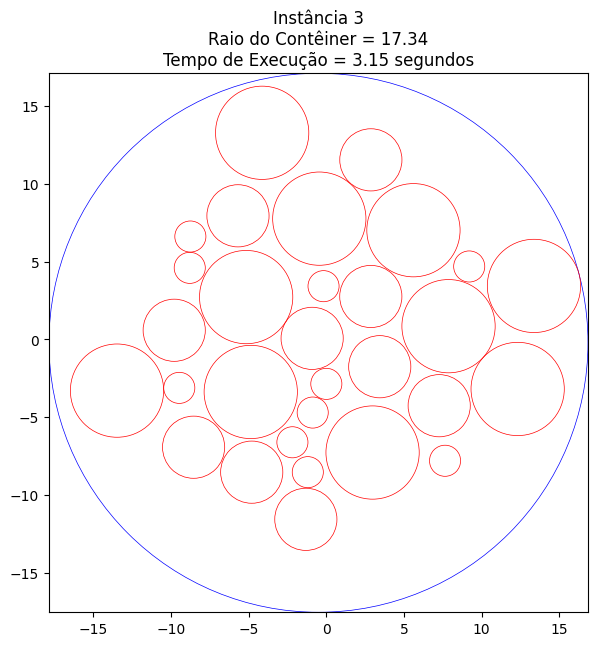

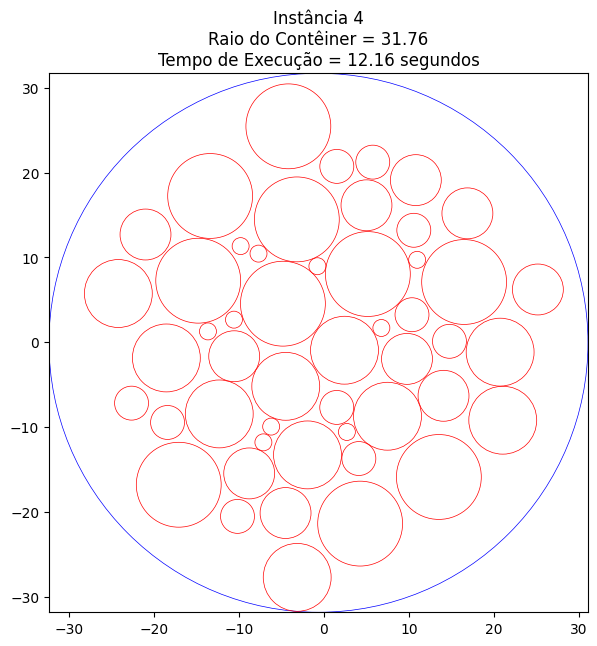

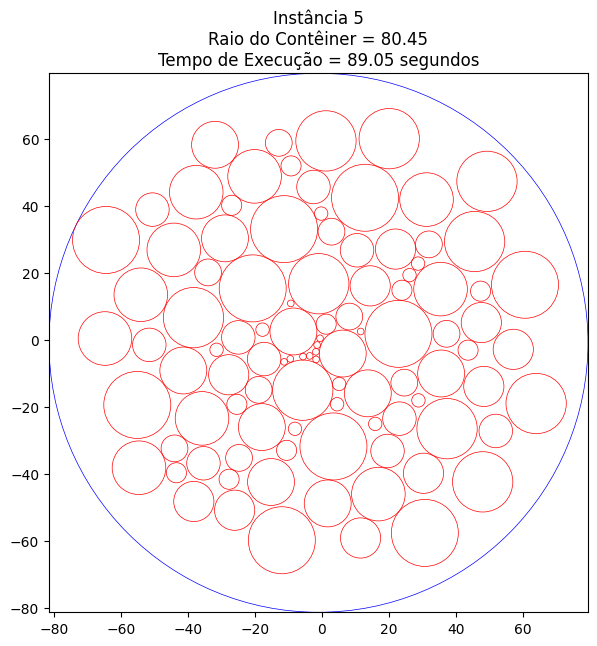

In [43]:
##ESTRATEGIA 2
random.seed(85)
# Definir as instâncias de círculos (raio e quantidade)
instancias_circulos = [
    [{"raio": 1}, {"raio": 2}, {"raio": 3}, {"raio": 4}, {"raio": 5}, {"raio": 6}, {"raio": 7}],
    [{"raio": 1} for _ in range(5)] + [{"raio": 2} for _ in range(5)] + [{"raio": 3} for _ in range(5)],
    [{"raio": 1} for _ in range(10)] + [{"raio": 2} for _ in range(10)] + [{"raio": 3} for _ in range(10)],
    [{"raio": 1} for _ in range(10)] + [{"raio": 2} for _ in range(10)] + [{"raio": 3} for _ in range(10)]  + [{"raio": 4} for _ in range(10)] + [{"raio": 5} for _ in range(10)],
    [{"raio": 1} for _ in range(10)] + [{"raio": 2} for _ in range(10)] + [{"raio": 3} for _ in range(10)]  + [{"raio": 4} for _ in range(10)] + [{"raio": 5} for _ in range(10)] + [{"raio": 6} for _ in range(10)] + [{"raio": 7} for _ in range(10)] + [{"raio": 8} for _ in range(10)]  + [{"raio": 9} for _ in range(10)] + [{"raio": 10} for _ in range(10)]
]

# Função para verificar se um círculo se sobrepõe com outros em uma lista de círculos
def se_sobrepoe(circulo, circulos_em_contenedor):
    for c in circulos_em_contenedor:
        distancia_centros = math.sqrt((circulo["x"] - c["x"])**2 + (circulo["y"] - c["y"])**2)
        if distancia_centros < circulo["raio"] + c["raio"]:
            return True
    return False

# Função para encontrar a posição de um círculo no contêiner com base em uma posição central personalizada
def encontrar_posicao(circulo, circulos_em_contenedor, raio_contenedor, posicao_central):
    intentos = 0
    while intentos < 5900:
        angulo = random.uniform(0, 5 * math.pi)
        # Gerar uma distância aleatória dentro do círculo
        distancia = random.uniform(0, raio_contenedor - circulo["raio"])
        # Calcular as coordenadas x e y do círculo com base na posição central
        circulo["x"] = posicao_central[0] + distancia * math.cos(angulo)
        circulo["y"] = posicao_central[1] + distancia * math.sin(angulo)
        if not se_sobrepoe(circulo, circulos_em_contenedor):
            return True
        intentos += 1
    return False

# Função principal para resolver o PECD e visualizar a solução para cada instância
def resolver():
    for i, instancia_circulos in enumerate(instancias_circulos):
        circulos_em_contenedor = []

        # Definir a posição central desejada
        posicao_central_desejada = (0, 0)

        # Embaralhar aleatoriamente a lista de círculos da instância atual
        random.shuffle(instancia_circulos)

        # Medir o tempo de execução
        start_time = time.time()

        # Colocar os círculos no contêiner
        for circulo in instancia_circulos:
            raio_contenedor_personalizado = circulo["raio"] * 2
            while not encontrar_posicao(circulo, circulos_em_contenedor, raio_contenedor_personalizado, posicao_central_desejada):
                raio_contenedor_personalizado += 1

            circulos_em_contenedor.append(circulo)

    # Calcular o novo centro como a média das coordenadas dos círculos posicionados
        novo_centro_x = sum(circulo["x"] for circulo in circulos_em_contenedor) / len(circulos_em_contenedor)
        novo_centro_y = sum(circulo["y"] for circulo in circulos_em_contenedor) / len(circulos_em_contenedor)

        # Calcular o novo raio como a maior distância entre um círculo e o novo centro mais seu raio
        novo_raio = max(math.sqrt((circulo["x"] - novo_centro_x)**2 + (circulo["y"] - novo_centro_y)**2) + circulo["raio"]
                        for circulo in circulos_em_contenedor)

        # Calcular o tempo de execução
        end_time = time.time()
        tempo_execucao = end_time - start_time

        # Configurar a figura e o eixo
        fig, ax = plt.subplots(figsize=(7, 7))

        # Desenhar o contêiner circular
        contenedor = plt.Circle((novo_centro_x, novo_centro_y), novo_raio, fill=False, color='b', lw=0.5)
        ax.add_patch(contenedor)

        # Desenhar os círculos no contêiner
        for circulo in circulos_em_contenedor:
            circulo_desenho = plt.Circle((circulo["x"], circulo["y"]), circulo["raio"], fill=False, color='r', lw=0.5)
            ax.add_patch(circulo_desenho)

        ax.set_aspect('equal')
        ax.set_xlim(novo_centro_x - novo_raio, novo_centro_x + novo_raio)
        ax.set_ylim(novo_centro_y - novo_raio, novo_centro_y + novo_raio)

        # Adicionar o título ao gráfico com o nome da instância e o tempo de execução
        titulo = f'Instância {i+1}\nRaio do Contêiner = {novo_raio:.2f}\nTempo de Execução = {tempo_execucao:.2f} segundos'
        plt.title(titulo)
        plt.gca().set_aspect('equal', adjustable='box')

        # Salvar a imagem com o nome da instância
        nome_arquivo = f'ALEATORIO INSTANCIA{i+1}.png'
        plt.savefig(nome_arquivo, dpi=100)
        plt.show()

# Chamar a função principal para resolver e salvar as instâncias
resolver()